## Task 3: Customer Segmentation / Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv(r"C:\Users\mrunmai k\OneDrive\Desktop\DataScienceInternAssign\files\Customers.csv")
products = pd.read_csv(r"C:\Users\mrunmai k\OneDrive\Desktop\DataScienceInternAssign\files\Products.csv")
transactions = pd.read_csv(r"C:\Users\mrunmai k\OneDrive\Desktop\DataScienceInternAssign\files\Transactions.csv")


In [3]:
# Merge data
merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")


In [4]:
# Aggregate transaction data per customer
customer_agg = merged_data.groupby("CustomerID").agg(
    total_spent=pd.NamedAgg(column="TotalValue", aggfunc="sum"),
    avg_transaction_value=pd.NamedAgg(column="TotalValue", aggfunc="mean"),
    num_transactions=pd.NamedAgg(column="TransactionID", aggfunc="count"),
    most_frequent_product=pd.NamedAgg(column="ProductID", aggfunc=lambda x: x.mode()[0]),
).reset_index()

In [5]:
# Merge aggregated data with customer profiles
customer_features = pd.merge(customers, customer_agg, on="CustomerID", how="left")


In [6]:
# Handle missing values
customer_features.fillna(0, inplace=True)

In [7]:
# Encode categorical data
customer_features_encoded = pd.get_dummies(customer_features, columns=["Region"], drop_first=True)


In [8]:
# Select features for clustering
# Drop non-numeric columns and handle categorical features
features = customer_features_encoded.drop(columns=["CustomerID", "CustomerName", "SignupDate", "most_frequent_product"])

# Standardize numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Verify the data after preprocessing
print(f"Scaled features shape: {scaled_features.shape}")


Scaled features shape: (200, 6)


In [9]:
# Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(scaled_features)

In [10]:
# Add cluster labels to the dataset
customer_features["Cluster"] = labels

In [11]:
# Evaluate clustering
db_index = davies_bouldin_score(scaled_features, labels)
silhouette_avg = silhouette_score(scaled_features, labels)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.1926430643192665
Silhouette Score: 0.31973356884457993


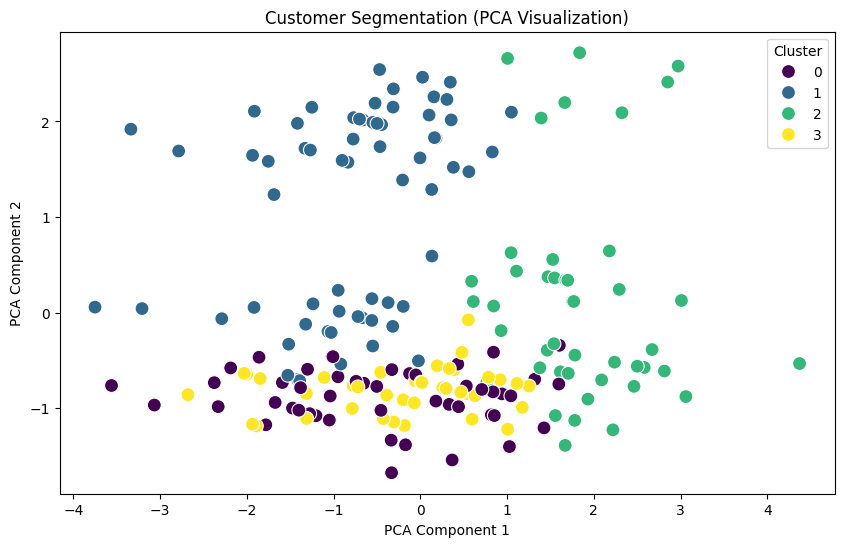

In [12]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette="viridis", s=100)
plt.title("Customer Segmentation (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [13]:
# Save clustering results
customer_features.to_csv("Customer_Clusters.csv", index=False)